In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
test_thera = pd.read_excel('Research Analyst_16SEPT2021.xlsx')
test_thera.head()

,patient #,days in the NICU,age,gender,hospital code,type of surgery,use of postoperative drain,entry of paranasal sinus,CSF leak,duration of operation,diabetes mellitus,GCS,SSI,discharge status,glucorticoids,lumbar drainage,income bracket,systolic bp preoperative
0,1,3,49,male,5,Burr hole operation,not used,not present,present,72.0,present,15,postive,dead,used,used,5,134.0
1,2,7,41,male,3,Burr hole operation,not used,present,present,33.0,not present,2,negative,dead,used,not used,2,158.0
2,3,7,46,female,7,Burr hole operation,not used,not present,present,83.0,present,8,negative,dead,used,used,5,158.0
3,4,7,63,male,5,Shunt operation,used,present,present,76.0,present,5,postive,alive,used,used,2,157.0
4,5,9,24,female,2,Spinal operation,used,not present,present,32.0,present,7,negative,dead,used,used,1,157.0


In [3]:
test_thera.set_index("patient #",inplace=True)
test_thera.info

<bound method DataFrame.info of            days in the NICU  age  gender  hospital code       type of surgery  \
patient #                                                                       
1                         3   49    male              5  Burr hole operation    
2                         7   41    male              3  Burr hole operation    
3                         7   46  female              7  Burr hole operation    
4                         7   63    male              5      Shunt operation    
5                         9   24  female              2     Spinal operation    
...                     ...  ...     ...            ...                   ...   
1075                      5   43    male              7  Burr hole operation    
1076                      8   39    male              6      Shunt operation    
1077                      9   37  female             10      Shunt operation    
1078                     11   45    male              6  Burr hole operation 

In [4]:
test_thera.rename(columns={"gender" : "sex"},inplace=True)
test_thera.rename(columns={"systolic bp preoperative":"blood pressure"},inplace=True)
test_thera.head()

,days in the NICU,age,sex,hospital code,type of surgery,use of postoperative drain,entry of paranasal sinus,CSF leak,duration of operation,diabetes mellitus,GCS,SSI,discharge status,glucorticoids,lumbar drainage,income bracket,blood pressure
patient #,,,,,,,,,,,,,,,,,
1,3,49,male,5,Burr hole operation,not used,not present,present,72.0,present,15,postive,dead,used,used,5,134.0
2,7,41,male,3,Burr hole operation,not used,present,present,33.0,not present,2,negative,dead,used,not used,2,158.0
3,7,46,female,7,Burr hole operation,not used,not present,present,83.0,present,8,negative,dead,used,used,5,158.0
4,7,63,male,5,Shunt operation,used,present,present,76.0,present,5,postive,alive,used,used,2,157.0
5,9,24,female,2,Spinal operation,used,not present,present,32.0,present,7,negative,dead,used,used,1,157.0


In [5]:
test_thera=test_thera.replace({'income bracket':{1:"<10,000", 2:"10,000 to 20,000", 3:"20,001 to 30,000", 
                                      4:"30,001 to 40,000",5:">40,001" }},regex=True)
test_thera['income bracket'].head(6)


patient #
1             >40,001
2    10,000 to 20,000
3             >40,001
4    10,000 to 20,000
5             <10,000
6             <10,000
Name: income bracket, dtype: object

In [6]:
"""In next step , will insert the missing value in column duration of opertaion and blood pressure using MICE procdure.
as these 2 colums are consider under categoery 'Missing completely at Randon'(MCAR) which implies we can't predict from any other column values such duration of operation"""



"In next step , will insert the missing value in column duration of opertaion and blood pressure using MICE procdure.\nas these 2 colums are consider under categoery 'Missing completely at Randon'(MCAR) which implies we can't predict from any other column values such duration of operation"

In [7]:
"""No of missing values in each column"""
test_thera.isna().sum()



days in the NICU               0
age                            0
sex                            0
hospital code                  0
type of surgery                0
use of postoperative drain     0
entry of paranasal sinus       0
CSF leak                       0
duration of operation         12
diabetes mellitus              0
GCS                            0
SSI                            0
discharge status               0
glucorticoids                  0
lumbar drainage                0
income bracket                 0
blood pressure                34
dtype: int64

In [8]:
#filling up the missing values in column 'duration of operation' and 'blood preesure' using interpolate method (linear)
#As those are the only 2 column having missing values.
test_thera.interpolate(inplace=True)
test_thera


,days in the NICU,age,sex,hospital code,type of surgery,use of postoperative drain,entry of paranasal sinus,CSF leak,duration of operation,diabetes mellitus,GCS,SSI,discharge status,glucorticoids,lumbar drainage,income bracket,blood pressure
patient #,,,,,,,,,,,,,,,,,
1,3,49,male,5,Burr hole operation,not used,not present,present,72.0,present,15,postive,dead,used,used,">40,001",134.0
2,7,41,male,3,Burr hole operation,not used,present,present,33.0,not present,2,negative,dead,used,not used,"10,000 to 20,000",158.0
3,7,46,female,7,Burr hole operation,not used,not present,present,83.0,present,8,negative,dead,used,used,">40,001",158.0
4,7,63,male,5,Shunt operation,used,present,present,76.0,present,5,postive,alive,used,used,"10,000 to 20,000",157.0
5,9,24,female,2,Spinal operation,used,not present,present,32.0,present,7,negative,dead,used,used,"<10,000",157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,5,43,male,7,Burr hole operation,not used,not present,present,39.0,not present,12,negative,alive,not used,used,"20,001 to 30,000",159.0
1076,8,39,male,6,Shunt operation,not used,not present,present,48.0,present,7,negative,alive,not used,used,"<10,000",142.0
1077,9,37,female,10,Shunt operation,not used,not present,present,59.0,present,1,postive,alive,not used,used,"20,001 to 30,000",113.0


In [9]:
print(test_thera[['blood pressure','duration of operation','age','days in the NICU','GCS']].describe())

       blood pressure  duration of operation          age  days in the NICU  \
count     1079.000000            1079.000000  1079.000000       1079.000000   
mean       137.582020              58.165431    44.831325          6.448563   
std         21.439785              15.109408    15.152450          2.842967   
min         98.000000              32.000000    19.000000          2.000000   
25%        119.250000              44.500000    32.000000          4.000000   
50%        137.000000              59.000000    44.000000          6.000000   
75%        155.000000              72.000000    59.000000          9.000000   
max        176.000000              83.000000    72.000000         11.000000   

               GCS  
count  1079.000000  
mean      8.271548  
std       4.378798  
min       1.000000  
25%       5.000000  
50%       8.000000  
75%      12.000000  
max      15.000000  


Text(0.5, 0, 'GCS')

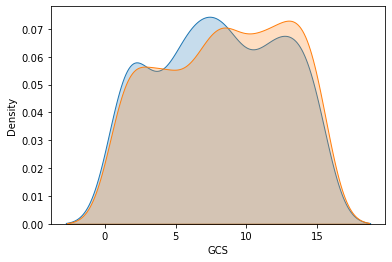

In [10]:
import seaborn as sns
sns.kdeplot(test_thera.GCS[test_thera.sex=='male'], label='male', shade=True)
sns.kdeplot(test_thera.GCS[test_thera.sex=='female'], label='female', shade=True)
plt.xlabel('GCS')

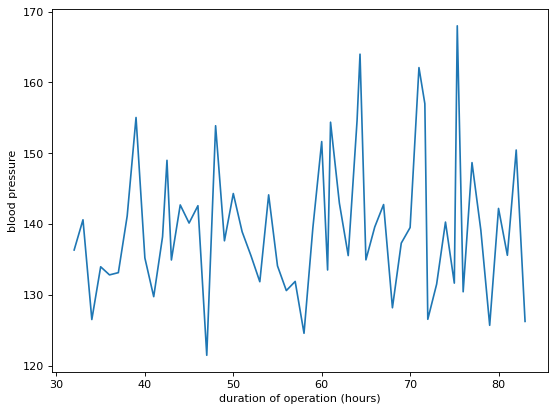

In [11]:
data = test_thera.groupby('duration of operation')
meandata= data.mean()
meandata = meandata.reset_index()
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
y = meandata['blood pressure']
x = meandata['duration of operation']

plt.plot(x,y)

plt.ylabel("blood pressure")
plt.xlabel("duration of operation (hours)")
plt.show()


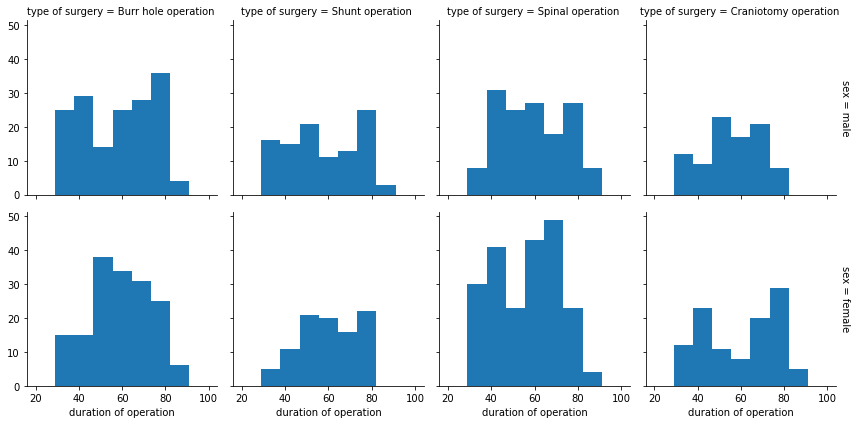

In [12]:
graph = sns.FacetGrid(test_thera, row="sex", col="type of surgery", margin_titles=True)
graph.map(plt.hist, "duration of operation", bins=np.linspace(20, 100, 10));

In [13]:
risk =[]
for row in test_thera['days in the NICU']:
    if row <=2 : risk.append('low-risk')
    else: risk.append('high-risk')
test_thera['risk']=risk
test_thera[['days in the NICU', 'risk']].head(6)

,days in the NICU,risk
patient #,,
1,3,high-risk
2,7,high-risk
3,7,high-risk
4,7,high-risk
5,9,high-risk
6,2,low-risk


In [14]:
test_thera.groupby('risk').mean()
#Based on below result patient at low risk having more GCS and blood pressure closer to normal range. 

,days in the NICU,age,hospital code,duration of operation,GCS,blood pressure
risk,,,,,,
high-risk,6.984424,45.313603,5.403946,57.820872,8.142264,138.291277
low-risk,2.000000,40.827586,5.034483,61.025862,9.344828,131.693966


In [15]:
#split the dataframe based on risk 
test_thera1= test_thera[test_thera['risk']=='high-risk']
test_thera2=test_thera[test_thera['risk']=='low-risk']

In [16]:
test_thera1['blood pressure'].describe()

count    963.000000
mean     138.291277
std       21.326240
min       98.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      176.000000
Name: blood pressure, dtype: float64

In [17]:
test_thera2['blood pressure'].describe()

count    116.000000
mean     131.693966
std       21.566154
min       99.000000
25%      118.000000
50%      125.000000
75%      145.000000
max      176.000000
Name: blood pressure, dtype: float64

In [18]:
import scipy
def ftest(x,y):
    x= test_thera1['blood pressure']
    y= test_thera2['blood pressure']
    f=np.var(x, ddof=1)/np.var(y,ddof=1)
    dfnum =x.size-1
    dfden = y.size-1
    p=1-scipy.stats.f.cdf(f,dfnum,dfden)
    return f,p
ftest(x,y)
 
      

(0.9778745708675017, 0.5781985349959495)

In [19]:
""" As per the ftest result between low risk and high risk patient, p value is more then significance level of 5%. which conclude, we dont have sufficient evidence to say high and low risk population variance are not equal based on blood pressure"""



' As per the ftest result between low risk and high risk patient, p value is more then significance level of 5%. which conclude, we dont have sufficient evidence to say high and low risk population variance are not equal based on blood pressure'

In [20]:
def ftest2(x,y):
    x= test_thera1['duration of operation']
    y= test_thera2['duration of operation']
    f=np.var(x, ddof=1)/np.var(y,ddof=1)
    dfnum =x.size-1
    dfden = y.size-1
    p=1-scipy.stats.f.cdf(f,dfnum,dfden)
    return f,p
ftest2(x,y)

(1.8743723839383843, 1.9758927531365877e-05)

In [21]:
def ftest3(x,y):
    x= test_thera1['GCS']
    y= test_thera2['GCS']
    f=np.var(x, ddof=1)/np.var(y,ddof=1)
    dfnum =x.size-1
    dfden = y.size-1
    p=1-scipy.stats.f.cdf(f,dfnum,dfden)
    return f,p
ftest3(x,y)

(1.0607925520994497, 0.3509506592952327)

In [22]:
""" As per the ftest3 result between low risk and high risk patient, p value is more then significance level of 5%. which conclude, we dont have sufficient evidence to say high and low risk population variance are not equal based on GCS"""



' As per the ftest3 result between low risk and high risk patient, p value is more then significance level of 5%. which conclude, we dont have sufficient evidence to say high and low risk population variance are not equal based on GCS'

In [23]:
csf=(test_thera1['CSF leak'] == 'present').sum()
diabetes = (test_thera1['diabetes mellitus '] == 'present').sum() 
print("there are 963 patient at high risk out of 963 having ")
print('Csf leak (%)')
print((csf/963)*100)
print('% of diabetes patient at high risk')
print((diabetes/963)*100)

there are 963 patient at high risk out of 963 having 
Csf leak (%)
70.19730010384217
% of diabetes patient at high risk
54.72481827622014


In [24]:
csf1=(test_thera2['CSF leak'] == 'present').sum()
diabetes1 = (test_thera2['diabetes mellitus '] == 'present').sum() 
print("there are 116 patient at low risk out of 116 having ")
print('Csf leak (%)')
print((csf1/116)*100)
print('% of diabetes pateient at low risk')
print((diabetes1/116)*100)

there are 116 patient at low risk out of 116 having 
Csf leak (%)
61.206896551724135
% of diabetes pateient at low risk
60.3448275862069
